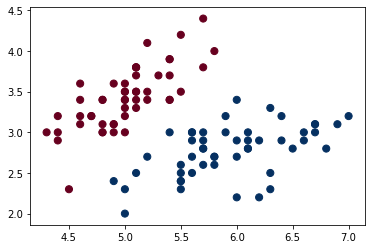

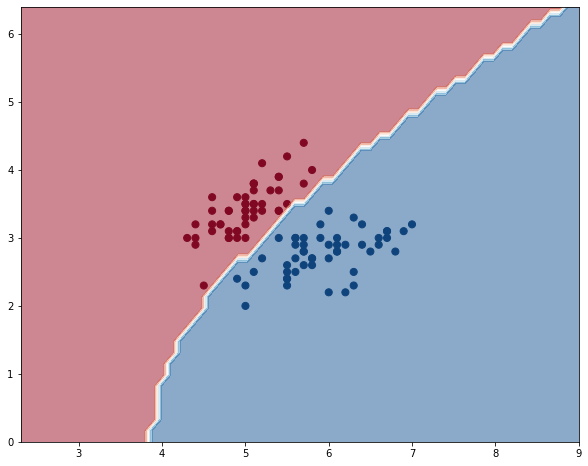

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from matplotlib import pyplot as plt
from sklearn import neighbors, datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:-50, :2]
y = iris.target[:-50]



xlim = (min(X[:,0])-2, max(X[:,0])+2)
ylim = (min(X[:,1])-2, max(X[:,1])+2)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

model=SVC(kernel='poly',gamma=10)
model.fit(X,y)
Z =  model.predict(Xgrid)
Z = Z.reshape(xx.shape)
plt.subplots( figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')    
plt.contourf(xx,yy,Z, cmap='RdBu', alpha=0.5)




C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


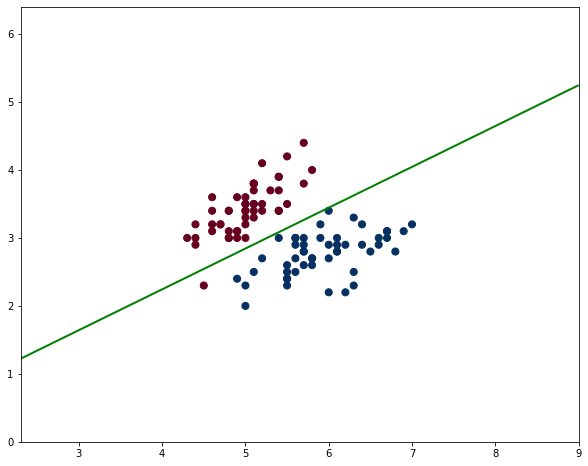

In [29]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X,y)
Z =  model.predict_proba(Xgrid)
Z = Z[:,1].reshape(xx.shape)
plt.subplots( figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')    
plt.contour(xx,yy,Z,[0.5],linewidths=2, colors='green')

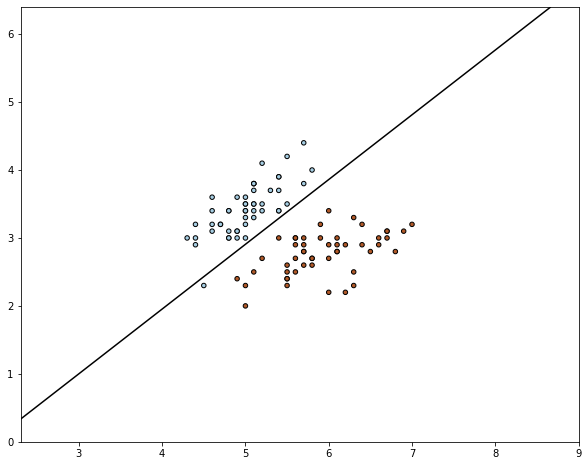

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn import datasets
iris = datasets.load_iris()
# we create 50 separable points
X = iris.data[:-50, :2]
Y = iris.target[:-50]
# fit the model
clf = SGDClassifier(loss="modified_huber", alpha=0.01)
clf.fit(X, Y)

# plot the line, the points, and the nearest vectors to the plane
xlim = (min(X[:,0])-2, max(X[:,0])+2)
ylim = (min(X[:,1])-2, max(X[:,1])+2)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
X1, X2 = np.meshgrid(xg, yg)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = clf.decision_function([[x1, x2]])
    Z[i, j] = p[0]

colors = 'k'
plt.subplots( figsize=(10, 8))
plt.contour(X1, X2, Z, 0, colors=colors, linestyles=linestyles)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired,
            edgecolor='black', s=20)

plt.axis('tight')
plt.show()
